Decision Tree (max_depth=3) Accuracy: 0.9833
Decision Tree (max_depth=10) Accuracy: 0.9967
Random Forest (n_estimators=10) Accuracy: 0.9867
Random Forest (n_estimators=100) Accuracy: 1.0000


<ipython-input-1-408c174f82d5>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-1-408c174f82d5>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-1-408c174f82d5>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-1-408c174f82d5>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the fut

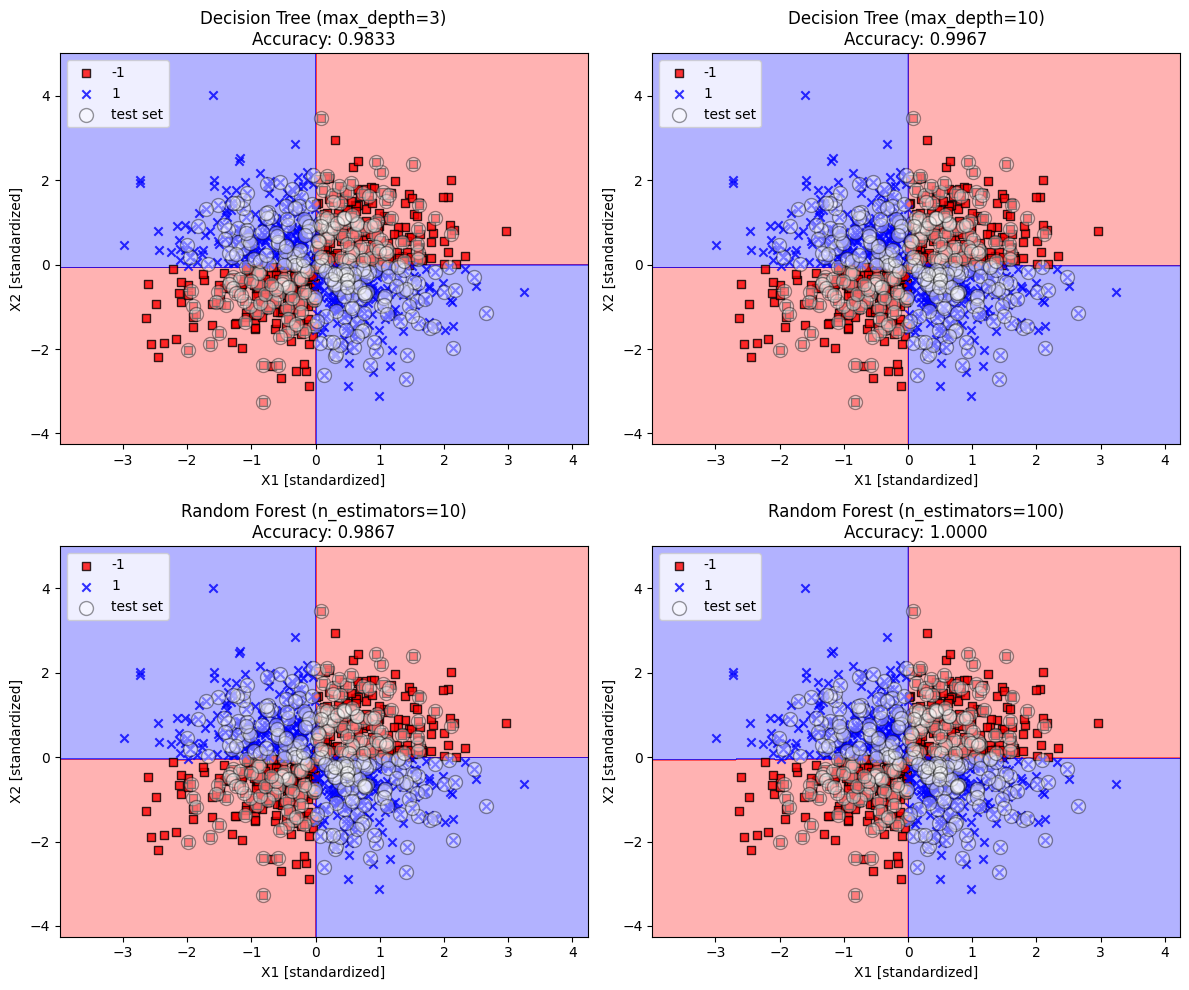

In [1]:
# ==== XOR Problem with Decision Tree and Random Forest ====

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# --- Import plot_decision_regions function ---
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='white',
                    edgecolor='black',
                    alpha=0.4,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

# --- Generate XOR dataset with 1000 samples ---
np.random.seed(1)
X_xor = np.random.randn(1000, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# --- Splitting data into 70% training and 30% test data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_xor, y_xor, test_size=0.3, random_state=42)

# --- Standardizing the features ---
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# --- Combine training and test data for plotting ---
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
test_idx = range(len(X_train_std), len(X_combined_std))

# --- Build Decision Tree models with two different depths ---
dt_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_shallow.fit(X_train_std, y_train)

dt_deep = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_deep.fit(X_train_std, y_train)

# --- Build Random Forest models with two different settings ---
rf_few = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_few.fit(X_train_std, y_train)

rf_many = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_many.fit(X_train_std, y_train)

# --- Test the models ---
y_pred_dt_shallow = dt_shallow.predict(X_test_std)
accuracy_dt_shallow = accuracy_score(y_test, y_pred_dt_shallow)
print(f"Decision Tree (max_depth=3) Accuracy: {accuracy_dt_shallow:.4f}")

y_pred_dt_deep = dt_deep.predict(X_test_std)
accuracy_dt_deep = accuracy_score(y_test, y_pred_dt_deep)
print(f"Decision Tree (max_depth=10) Accuracy: {accuracy_dt_deep:.4f}")

y_pred_rf_few = rf_few.predict(X_test_std)
accuracy_rf_few = accuracy_score(y_test, y_pred_rf_few)
print(f"Random Forest (n_estimators=10) Accuracy: {accuracy_rf_few:.4f}")

y_pred_rf_many = rf_many.predict(X_test_std)
accuracy_rf_many = accuracy_score(y_test, y_pred_rf_many)
print(f"Random Forest (n_estimators=100) Accuracy: {accuracy_rf_many:.4f}")

# --- Plot the decision boundaries ---
plt.figure(figsize=(12, 10))

# Decision Tree (max_depth=3)
plt.subplot(2, 2, 1)
plot_decision_regions(X_combined_std, y_combined, classifier=dt_shallow, test_idx=test_idx)
plt.title(f'Decision Tree (max_depth=3)\nAccuracy: {accuracy_dt_shallow:.4f}')
plt.xlabel('X1 [standardized]')
plt.ylabel('X2 [standardized]')
plt.legend(loc='upper left')

# Decision Tree (max_depth=10)
plt.subplot(2, 2, 2)
plot_decision_regions(X_combined_std, y_combined, classifier=dt_deep, test_idx=test_idx)
plt.title(f'Decision Tree (max_depth=10)\nAccuracy: {accuracy_dt_deep:.4f}')
plt.xlabel('X1 [standardized]')
plt.ylabel('X2 [standardized]')
plt.legend(loc='upper left')

# Random Forest (n_estimators=10)
plt.subplot(2, 2, 3)
plot_decision_regions(X_combined_std, y_combined, classifier=rf_few, test_idx=test_idx)
plt.title(f'Random Forest (n_estimators=10)\nAccuracy: {accuracy_rf_few:.4f}')
plt.xlabel('X1 [standardized]')
plt.ylabel('X2 [standardized]')
plt.legend(loc='upper left')

# Random Forest (n_estimators=100)
plt.subplot(2, 2, 4)
plot_decision_regions(X_combined_std, y_combined, classifier=rf_many, test_idx=test_idx)
plt.title(f'Random Forest (n_estimators=100)\nAccuracy: {accuracy_rf_many:.4f}')
plt.xlabel('X1 [standardized]')
plt.ylabel('X2 [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()